<h1>           The Sparks Foundation          </h1>
<h2>Data Science and Business Analytics Internship</h2>
<h1>Exploratory Data Analysis on SampleSuperStore dataset</h1>
<br><p>This is the task related to Business Analytics.</p>
<p>This task is to <b>explore the Retail store data and to gain useful insights</b>.</p>

<h4>Let's import the required libraries.</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

<p>The data is imported successfully.Let's get a gist of data.</p>

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


<p>We can see that there are a lot of columns to explore and <b>Category</b> column seems to be explorable.</p>

In [21]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [57]:
df.groupby("Category")['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='count'>

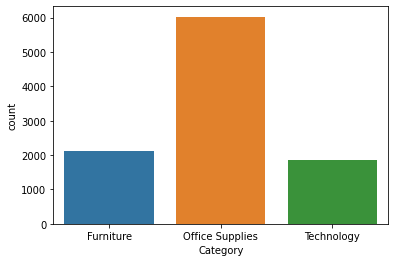

In [54]:
sns.countplot(x='Category',data=df)

<h4>We can see that Office supplies holds a major portion.</h4>
<h3>Let's see correlations between different pairs of columns.</h3>
<p>For this, I used heatmap,scatter plot,pair plot.</p>

<AxesSubplot:>

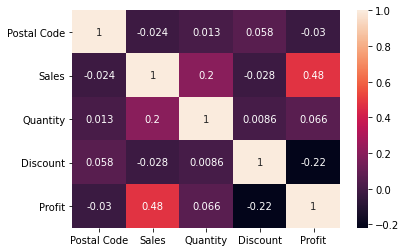

In [46]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

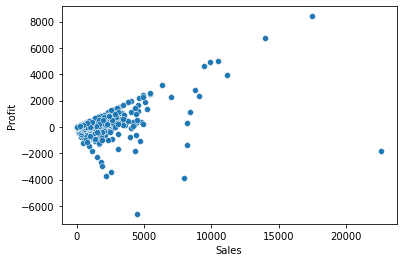

In [47]:
sns.scatterplot(x='Sales',y='Profit',data=df)

<p>We can see from both plots that there is correlation between sales and profit.<br>The higher the sales,the higher the profit.</p>
<h4>Let's plot correlations among different columns differentiated using Segment column.</h4>

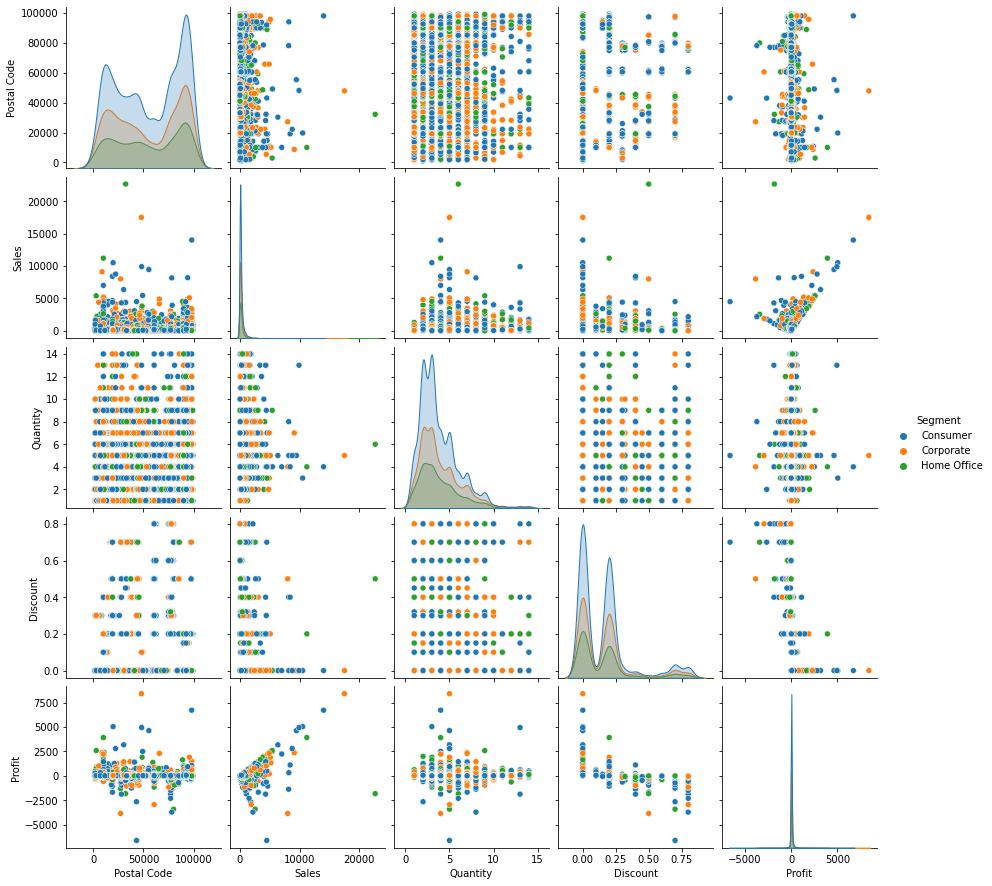

In [68]:
sns.pairplot(data=df,hue='Segment')

<p>The <b>Segment,Shipmode</b> columns seems interesting,let's explore further.</p> 

In [52]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [56]:
df.groupby("Segment")['Profit'].mean()

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='count'>

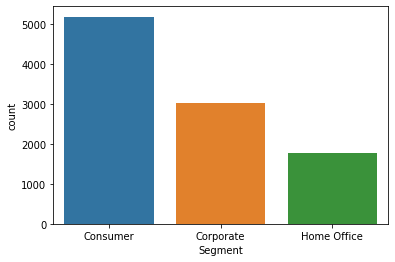

In [55]:
sns.countplot(x='Segment',data=df)

In [59]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [60]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [61]:
df.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

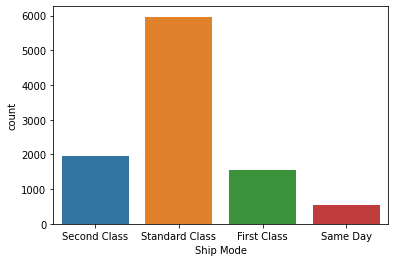

In [62]:
sns.countplot(x='Ship Mode',data=df)

In [65]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

<p>As the products are divided into Categories and Sub-Categories.Let's combine the insights from above plots with different categories of products.</p>

d:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


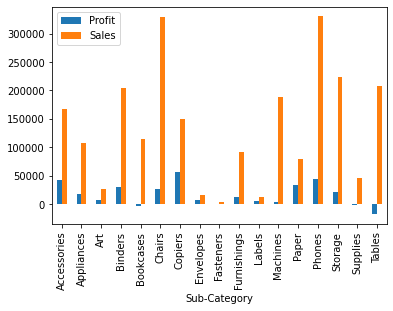

In [77]:
df.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar()
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

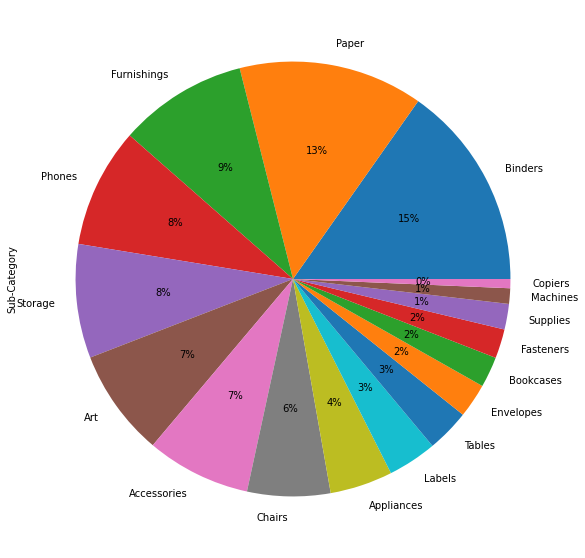

In [100]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.0d%%')

In [122]:
bind=df[df['Sub-Category']=='Binders']
boo=df[df['Sub-Category']=='Bookcases']
acc=df[df['Sub-Category']=='Accessories']

<AxesSubplot:xlabel='Segment', ylabel='count'>

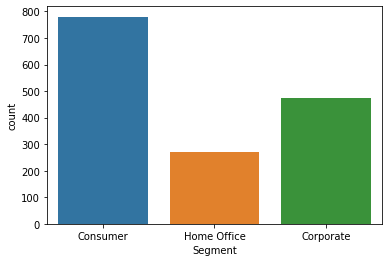

In [107]:
sns.countplot(x='Segment',data=bind)

<AxesSubplot:xlabel='Segment', ylabel='count'>

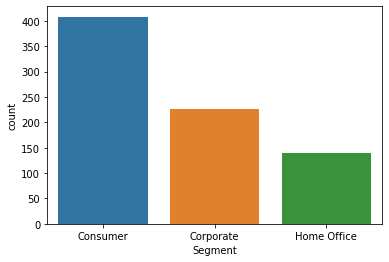

In [123]:
sns.countplot(x='Segment',data=acc)

<AxesSubplot:xlabel='Segment', ylabel='count'>

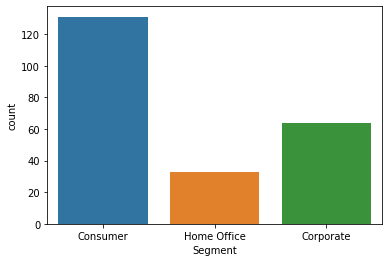

In [124]:
sns.countplot(x='Segment',data=boo)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

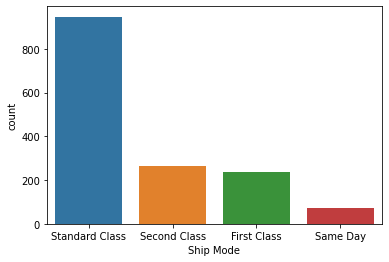

In [125]:
sns.countplot(x='Ship Mode',data=bind)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

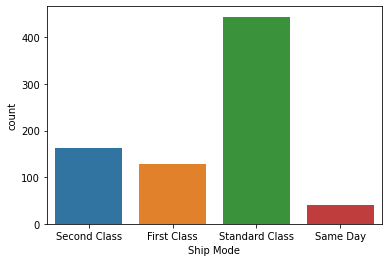

In [126]:
sns.countplot(x='Ship Mode',data=acc)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

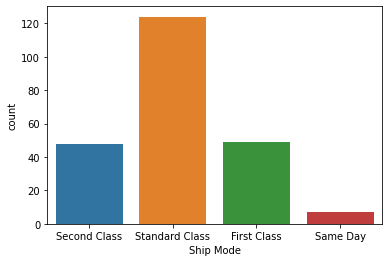

In [127]:
sns.countplot(x='Ship Mode',data=boo)

In [116]:
bind.groupby('Segment')['Profit'].sum()

Segment
Consumer       17995.5972
Corporate       6377.3201
Home Office     5848.8460
Name: Profit, dtype: float64

In [117]:
bind.groupby('Ship Mode')['Profit'].sum()

Ship Mode
First Class        4128.1425
Same Day           1140.2821
Second Class       5461.3420
Standard Class    19491.9967
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Profit'>

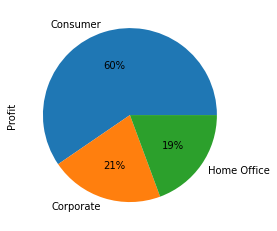

In [118]:
bind.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

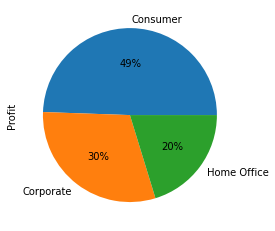

In [128]:
acc.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

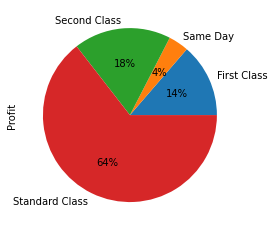

In [119]:
bind.groupby('Ship Mode')['Profit'].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

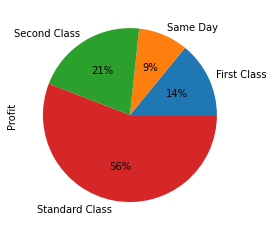

In [130]:
acc.groupby('Ship Mode')['Profit'].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:>

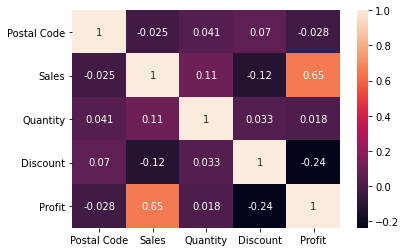

In [135]:
sns.heatmap(bind.corr(),annot=True)

<AxesSubplot:>

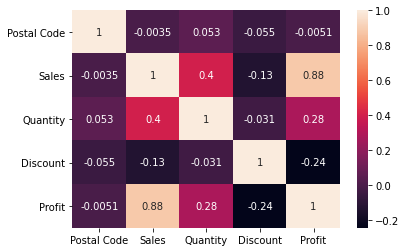

In [137]:
sns.heatmap(acc.corr(),annot=True)

<AxesSubplot:>

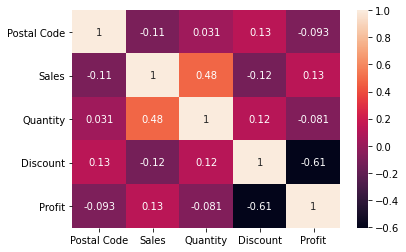

In [138]:
sns.heatmap(boo.corr(),annot=True)

In [163]:
df.groupby('Region').describe(include='all')['Category'][['top','freq']]

,top,freq
Region,,
Central,Office Supplies,1422
East,Office Supplies,1712
South,Office Supplies,995
West,Office Supplies,1897


In [165]:
(df[df['Category']=='Office Supplies']).groupby('Region').describe(include='all')['Sub-Category'][['top','freq']]

,top,freq
Region,,
Central,Binders,366
East,Binders,440
South,Binders,246
West,Binders,471


<p>After exploring different possible combinations,My insights are-<br>
   -> Many Customers prefer ShipMode of Standard class.We should improve the preference of SameDay Shipment by providing offers.</p>
   -> Products with higher Profits have positive Correlation with Sales ,whereas products with lower profit and corresponding sales are less relative.We should improve profit for such product by increasing their sales.</p> 
   I have explored the available data and has successfully derived above insights that will help to increase the profit for any product.

<h2>By<br><br>Anantha Sai Avadhanam</h2>